In [1]:
import sys

sys.path.append(r"D:\VENV_PYTHON\py3_8\Scripts")
from my_packages import *

In [2]:
folder2savefigure = r"E:\012_HOPE_TO_PUBLISH_PAPER\PROCESS_023\15_CALIBRATION_v003\Validated_by_Leveling_Benchmarks\v004\PSC_LinearLeveling_Comparison"
if not os.path.exists(folder2savefigure):
    os.makedirs(folder2savefigure)

In [3]:
# filepath = r"E:\012_HOPE_TO_PUBLISH_PAPER\PROCESS_023\15_CALIBRATION_v003\Validated_by_Leveling_Benchmarks\v004\LinearLeveling_vs_PS\leveling_psc_combined\linearvelocity_combined.csv"
filepath = r"D:\SENTINEL_1A_SAR_IMAGES\030_REPROCESS_CHOUSHUI_P2\CALIBRATION_PROCESS\Calibrated_Files\LOS_mm_ALL_POINTS_v010\VERT_mm\All_InSAR_Leveling_Comparison.xlsx"
df = pd.read_excel(filepath)
# df["ABS"] = abs(df["LEV_AvgVel"] - df["PSC_AvgVel"])
subdf = df[df["AbsError"] <= 20]
# subdf = df.copy()

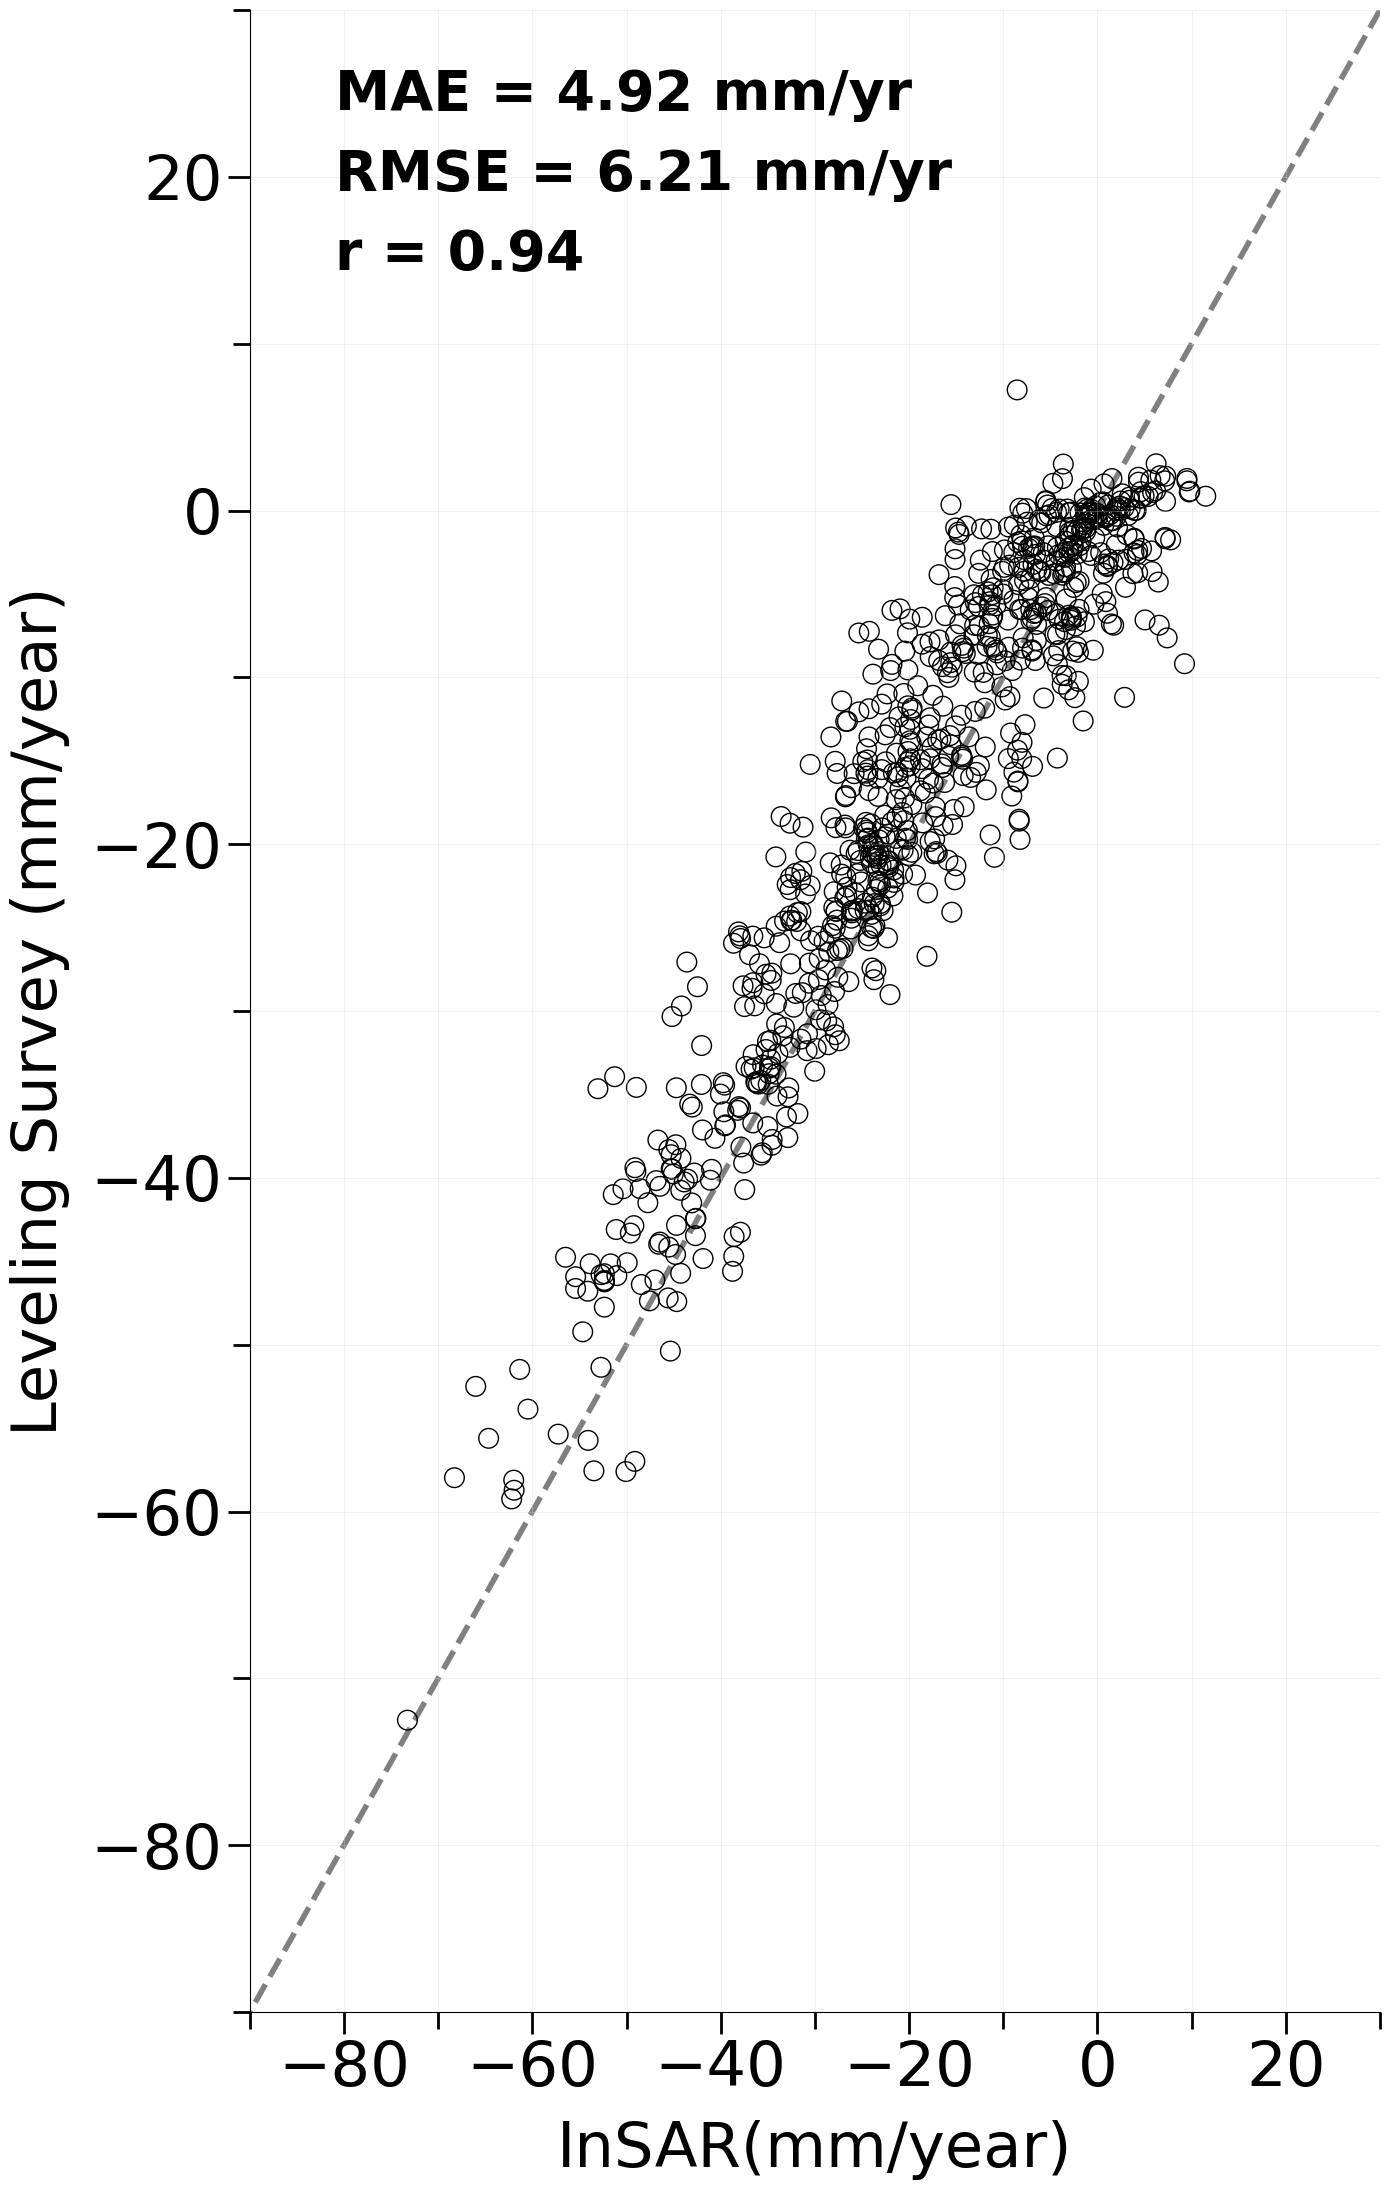

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cm = 1/2.54
fig = plt.figure(figsize=(14, 22))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis="both", which="both", color="lightgrey", alpha=0.3)
top_thres = 30
bot_thres = -90

x1, y1 = [top_thres, bot_thres], [top_thres, bot_thres]
ax.plot(x1, y1, linestyle="--", color="gray", linewidth=4, zorder=1)

ax.set_xlim(bot_thres, top_thres)
ax.set_ylim(bot_thres, top_thres)

# ax.set_aspect(aspect="equal", adjustable="box")

scatter_points = [(psc, lev) for psc, lev in zip(subdf["PSC_AvgVel"], subdf["LEV_AvgVel"])]

scatter_plot = ax.scatter(
    *zip(*scatter_points), s=200, facecolors="none", edgecolors="black", marker="o"
)

x = subdf["PSC_AvgVel"]
y = subdf["LEV_AvgVel"]

ax.set_xlabel("InSAR(mm/year)", fontsize=45, labelpad=15)
ax.set_ylabel("Leveling Survey (mm/year)", fontsize=45, labelpad=15)

mean_abs_err = np.mean(np.abs(x - y))
rmse = np.sqrt(np.mean((x - y) ** 2))
m, c, r, p, se1 = stats.linregress(x, y)

major_base = 20
minor_base = 10

x_major_loc = plticker.MultipleLocator(base=major_base)
x_minor_loc = plticker.MultipleLocator(base=minor_base)
ax.xaxis.set_major_locator(x_major_loc)
ax.xaxis.set_minor_locator(x_minor_loc)

y_major_loc = plticker.MultipleLocator(base=major_base)
y_minor_loc = plticker.MultipleLocator(base=minor_base)
ax.yaxis.set_major_locator(y_major_loc)
ax.yaxis.set_minor_locator(y_minor_loc)

ax.tick_params(axis="y", which="major", labelsize=45, direction="out", length=16, width=2)
ax.tick_params(axis="y", which="minor", labelsize=45, direction="out", length=12, width=2)

ax.tick_params(axis="x", which="major", labelsize=45, direction="out", length=16, width=2)
ax.tick_params(axis="x", which="minor", labelsize=45, direction="out", length=12, width=2)

ax.text(
    0.075,
    0.95,
    f"MAE = {mean_abs_err:.2f} mm/yr",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)
ax.text(
    0.075,
    0.91,
    f"RMSE = {rmse:.2f} mm/yr",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)

ax.text(
    0.075,
    0.87,
    f"r = {r:.2f}",
    transform=plt.gca().transAxes,
    fontweight="bold",
    fontsize=40,
)

ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()

base = "Leveling_PSC_LinearVelocity"

for i in range(1, 1001):
    savename = os.path.join(folder2savefigure, base + "_{}.png".format(str(i).zfill(3)))
    if os.path.exists(savename):
        continue
    else:
        break

plt.savefig(
    savename,
    dpi=600,
    transparent=False,
    facecolor="w",
    edgecolor="w",
    bbox_inches="tight",
)
# plt.close()
plt.show()